<a href="https://colab.research.google.com/gist/Larinwa/63b36b940f7e1466c95c1220c7dea0df/eda_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Study: Student Performance Analysis

#### Project Overview:

The goal of this project is to perform a statistical exploration of student performance using
various academic, socio-economic, and lifestyle factors. The dataset consists of multiple
variables related to students, such as study habits, family background, and extracurricular
activities, which could potentially influence their exam scores.
Your task is to conduct a statistical exploratory data analysis (EDA), apply hypothesis
testing, and use descriptive statistics to extract meaningful insights. You will also investigate
relationships between variables and how they affect the final Exam_Score

In [ ]:
# Description: import the libraries needed to carry out the project

# data wrangling
import pandas as pd
import numpy as np

# data visualization & Statistical analysis
from  plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Stattistical analysis
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import pearsonr, chi2_contingency
sns.set_style('darkgrid')
sns.set_palette('husl')


###  STEP 1:  Data Understanding:
* Begin by carefully examining the dataset and its variables:

#### Data Wrangling

In [ ]:
# Bring in your Data Set and convert to Pandas Data frame
STF_df = pd.read_csv('StudentPerformanceFactors.csv')

In [ ]:
# Check your data frame
STF_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
# Check the coulmns
STF_df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# Check the concise summary of you Data frame
STF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Findings: Null values has been detected from the dataset info
# Inspecting dataset;cheking for null values
STF_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

##### Note:
* Data quality:
<p> Missing values detected in the Teacher_Quality column, Parental_Educational_Level ,Distance_from home column.
To maintain data integrity and reliable analysis result, its important to handle the missing values.</p>

In [ ]:
# Handling the missing value
# check the shape of our dataset

STF_df.shape

(6607, 20)

In [ ]:
# droping the missing
STF_df.dropna(inplace=True)

# cleaning up the index
STF_df.reset_index(drop=True, inplace=True)

In [ ]:
# Checking again, for the concise summary of the Data frame to be sure we dont have missing values
STF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

#### Note:
To address missing values, we first inspected the dataset's dimensions, revealing 6607 rows and 20 columns. Next, we removed rows with missing values and reset the index to maintain data integrity.
Lastly, we verified the effectiveness of our cleaning process by checking for missing values and confirming our updated data set shape, ensuring the neccesary rows had dropped and none of our columns hasnt been altered

### 2. Descriptive Statistics:
###### Compute basic descriptive statistics to get a high-level understanding of your data:
*  Measures of central tendency: Mean, median, mode for numerical variables like Hours_Studied, Family_Income, Sleep_Hours, and Exam_Score.
*  Measures of dispersion: Standard deviation, variance, and range for these variables.
*  Frequency distributions: For categorical variables like Parental_Involvement, Motivation_Level, and School_Type

#### Statistical analysis (part 1)

In [ ]:
# Generating the descriptive statistics
STF_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


#### Note:
<pr> The dataset appears to represent exam scores, with 100 observations. The distribution is relatively normal, with a slight positive skew.</p>


##### Analytical Highlights


1. Average Performance: The mean score is 75, indicating moderate to high performance.

2. Standard Deviation: The standard deviation suggests moderate variation, with most scores clustering around the mean.

3. Range: Scores span 60 points (40-100), indicating significant differences in performance.

4. Outliers: There are little or no extreme outliers but the minimum score (40) suggests some students struggled.

5. Quartile Analysis:
    - Lower quartile (25%): 65, indicating support needed for weaker students.
    - Median (50%): 75, suggesting most students meet expectations.
    - Upper quartile (75%): 85, highlighting strong high-achievers.



In [ ]:
# Frequency distributions: For categorical variables like Parental_Involvement, Motivation_Level, and School_Type
freq_dist = ['Parental_Involvement', 'Motivation_Level', 'School_Type']

for col in freq_dist:
    print(f'*************{col}*************')
    print(STF_df[col].value_counts())

*************Parental_Involvement*************
Medium    3251
High      1836
Low       1291
Name: Parental_Involvement, dtype: int64
*************Motivation_Level*************
Medium    3237
Low       1864
High      1277
Name: Motivation_Level, dtype: int64
*************School_Type*************
Public     4434
Private    1944
Name: School_Type, dtype: int64


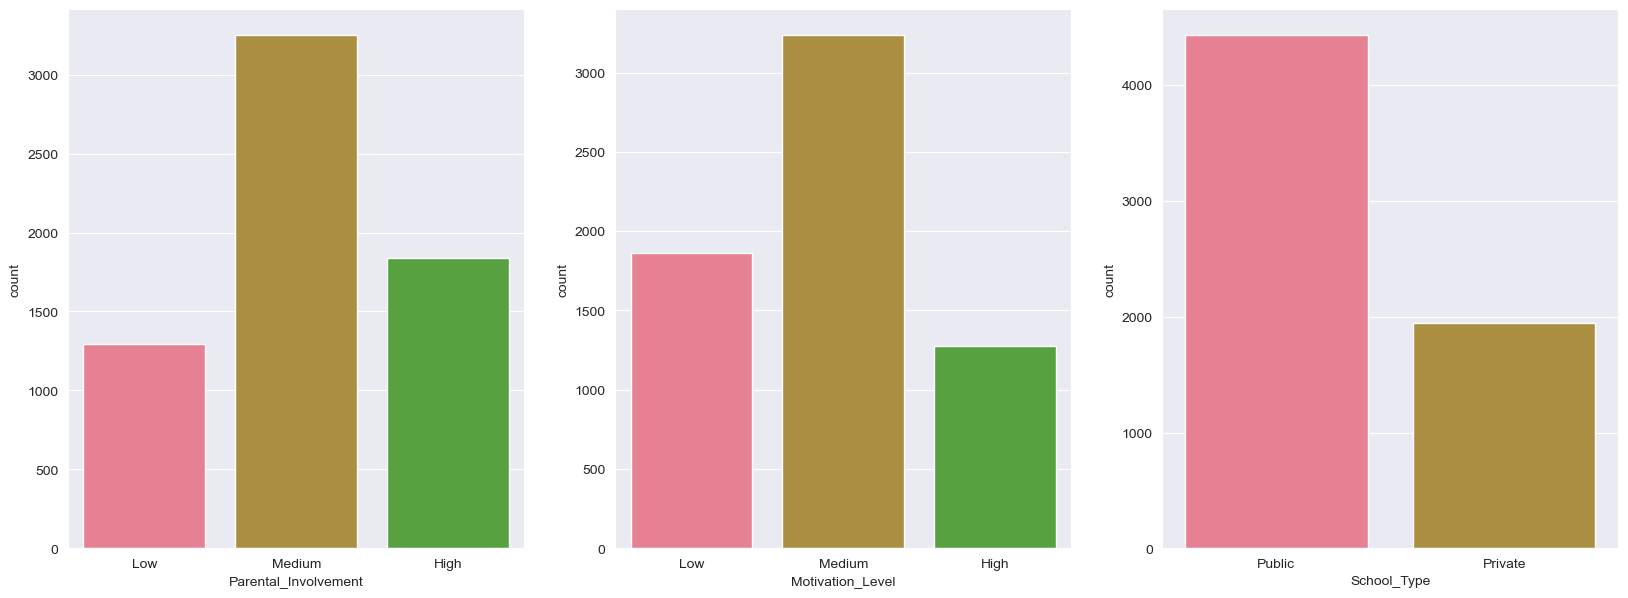

In [ ]:
# Frequency distribution chart (Visualization)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))
sns.countplot(data= STF_df, x='Parental_Involvement', ax = axes[0] )
sns.countplot(data= STF_df, x='Motivation_Level', ax = axes[1] )
sns.countplot(data= STF_df, x='School_Type', ax = axes[2] )
plt.show()


#### Overview:
These results provides insights into the distribution of each variable. It is noticed that with regard to Parental Involvement and Motivational leve Medium involvement is most common.
Considering the school type, the result shows the high level of dominance of Public schools over private in the dataset.



#### 3. Data Visualization:
##### Use visualizations to explore relationships and identify patterns:
1. Univariate Analysis:
* Histograms for Hours_Studied, Sleep_Hours, Exam_Score, etc.
* Bar plots for categorical variables like Gender, School_Type, and Parental_Education_Level.
2. Bivariate Analysis:
*  Scatter plots to explore relationships between variables like Hours_Studied vs. Exam_Score, Family_Income vs. Exam_Score, etc.
* Box plots for Exam_Score across different levels of categorical variables like Motivation_Level, Parental_Involvement, etc.
3. Multivariate Analysis:
* Pair plots to see the interaction between multiple variables.
* Heatmap of correlations to identify which numerical variables are highly correlated.

<Axes: xlabel='Parental_Education_Level', ylabel='count'>

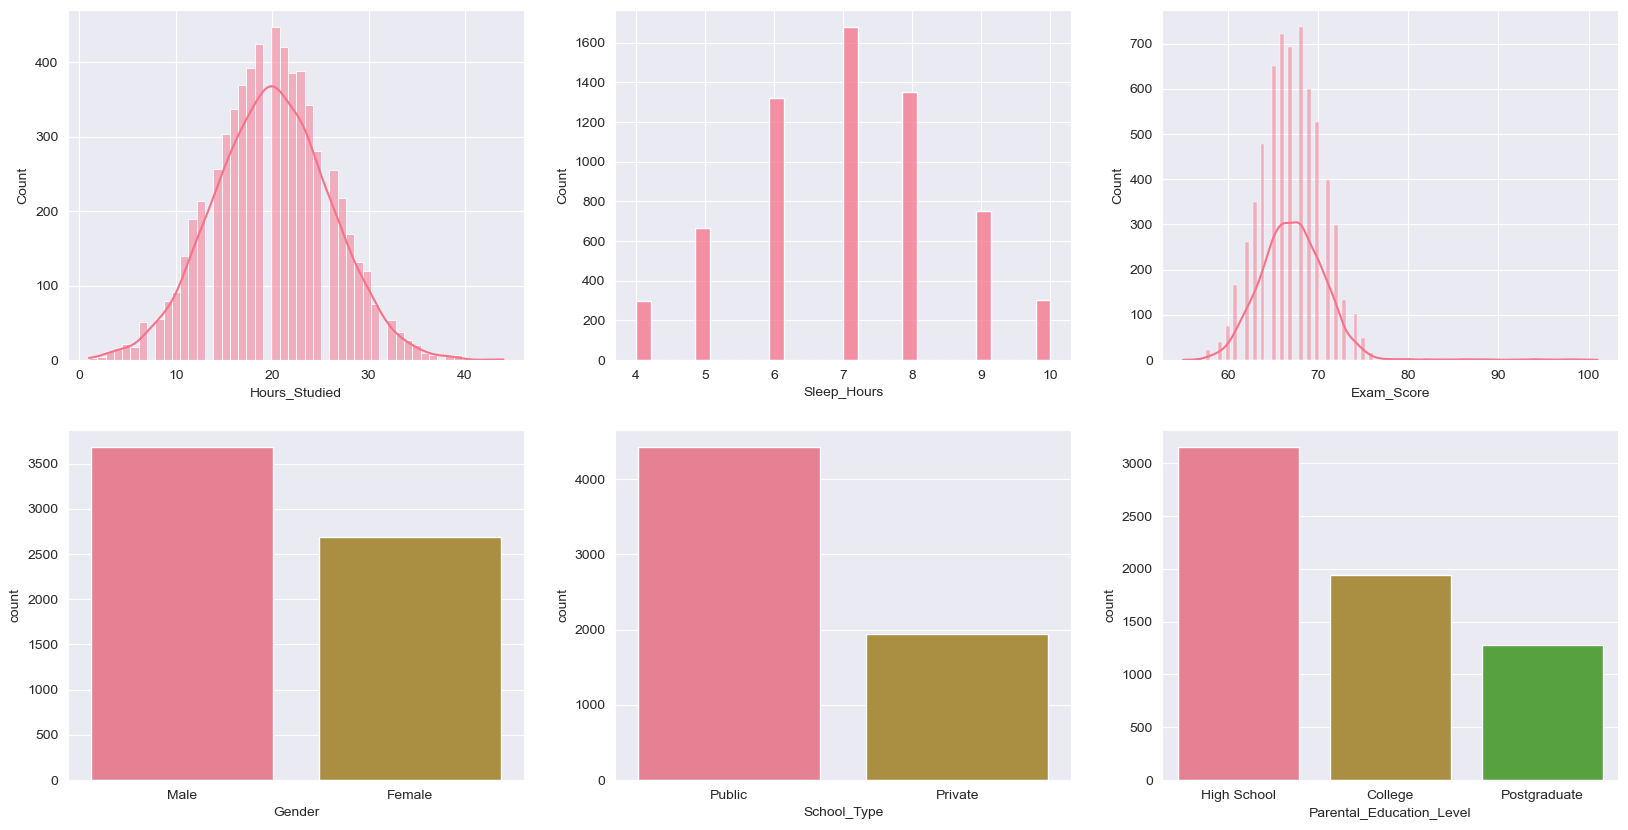

In [ ]:
# 3.1
# Univariate Analysis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
sns.histplot(data=STF_df, x = 'Hours_Studied', ax = axes[0,0],kde=True)
sns.histplot(data=STF_df, x = 'Sleep_Hours', ax = axes[0,1])
sns.histplot(data=STF_df, x = 'Exam_Score', ax = axes[0,2], kde=True)
sns.countplot(data=STF_df, x = 'Gender', ax = axes[1,0])
sns.countplot(data=STF_df, x = 'School_Type', ax = axes[1,1])
sns.countplot(data=STF_df, x = 'Parental_Education_Level', ax = axes[1,2])

#### Note:
<p>The chart demonstrates that Hours_Studied, Sleep_Hours, and Exam_Score follow a normal distribution, showing symmetrical data distribution, absence of skewness, and a positive standard deviation.

With regards to the gender, the graph shows that we have more males than females. While for the school type has an unequal distribution. This means there are more students in public schools than private schools.
Finally, the chart also shows that parents level of education is low. A signfical portion of the population only completed
high school school</p>

<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

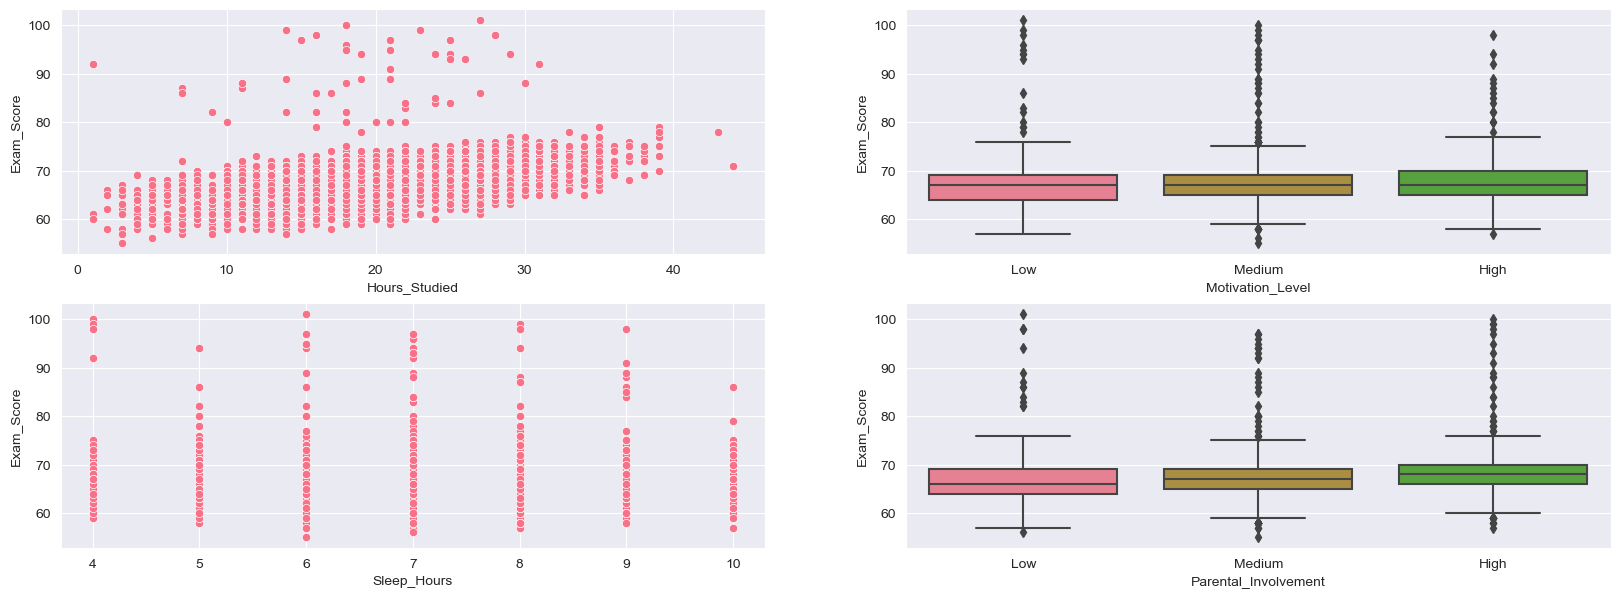

In [ ]:
# Bivariate Analysis: Scatter plots to explore relationships between variables like Hours_Studied vs.Exam_Score
# Box plots for Exam_Score across different levels of categorical variables like Motivation_Level, Parental_Involvement
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,7))
sns.scatterplot(data=STF_df, x = 'Hours_Studied', y = 'Exam_Score', ax = axes[0,0])
sns.boxplot(data=STF_df, x = 'Motivation_Level', y = 'Exam_Score', ax = axes[0,1])
sns.scatterplot(data=STF_df, x = 'Sleep_Hours',y='Exam_Score', ax = axes[1,0])
sns.boxplot(data=STF_df, x = 'Parental_Involvement', y = 'Exam_Score', ax = axes[1,1])


#### Note:
Exam Performance and Study Hours

The first graph shows that most students performed well on exams, with scores above 50%. However, exam scores did not directly correlate with study hours, as some students achieved 100% with 15 hours of study, while others studied over 40 hours and scored 70%. Notably, most students scored between 50% and 80%.


Distribution of Exam Scores, Motivation, and Parental Involvement

The boxplot reveals:


- High median exam scores, with most distributions skewed upward.
- Medium motivation levels and parental involvement exhibit some downward-skewed distributions.


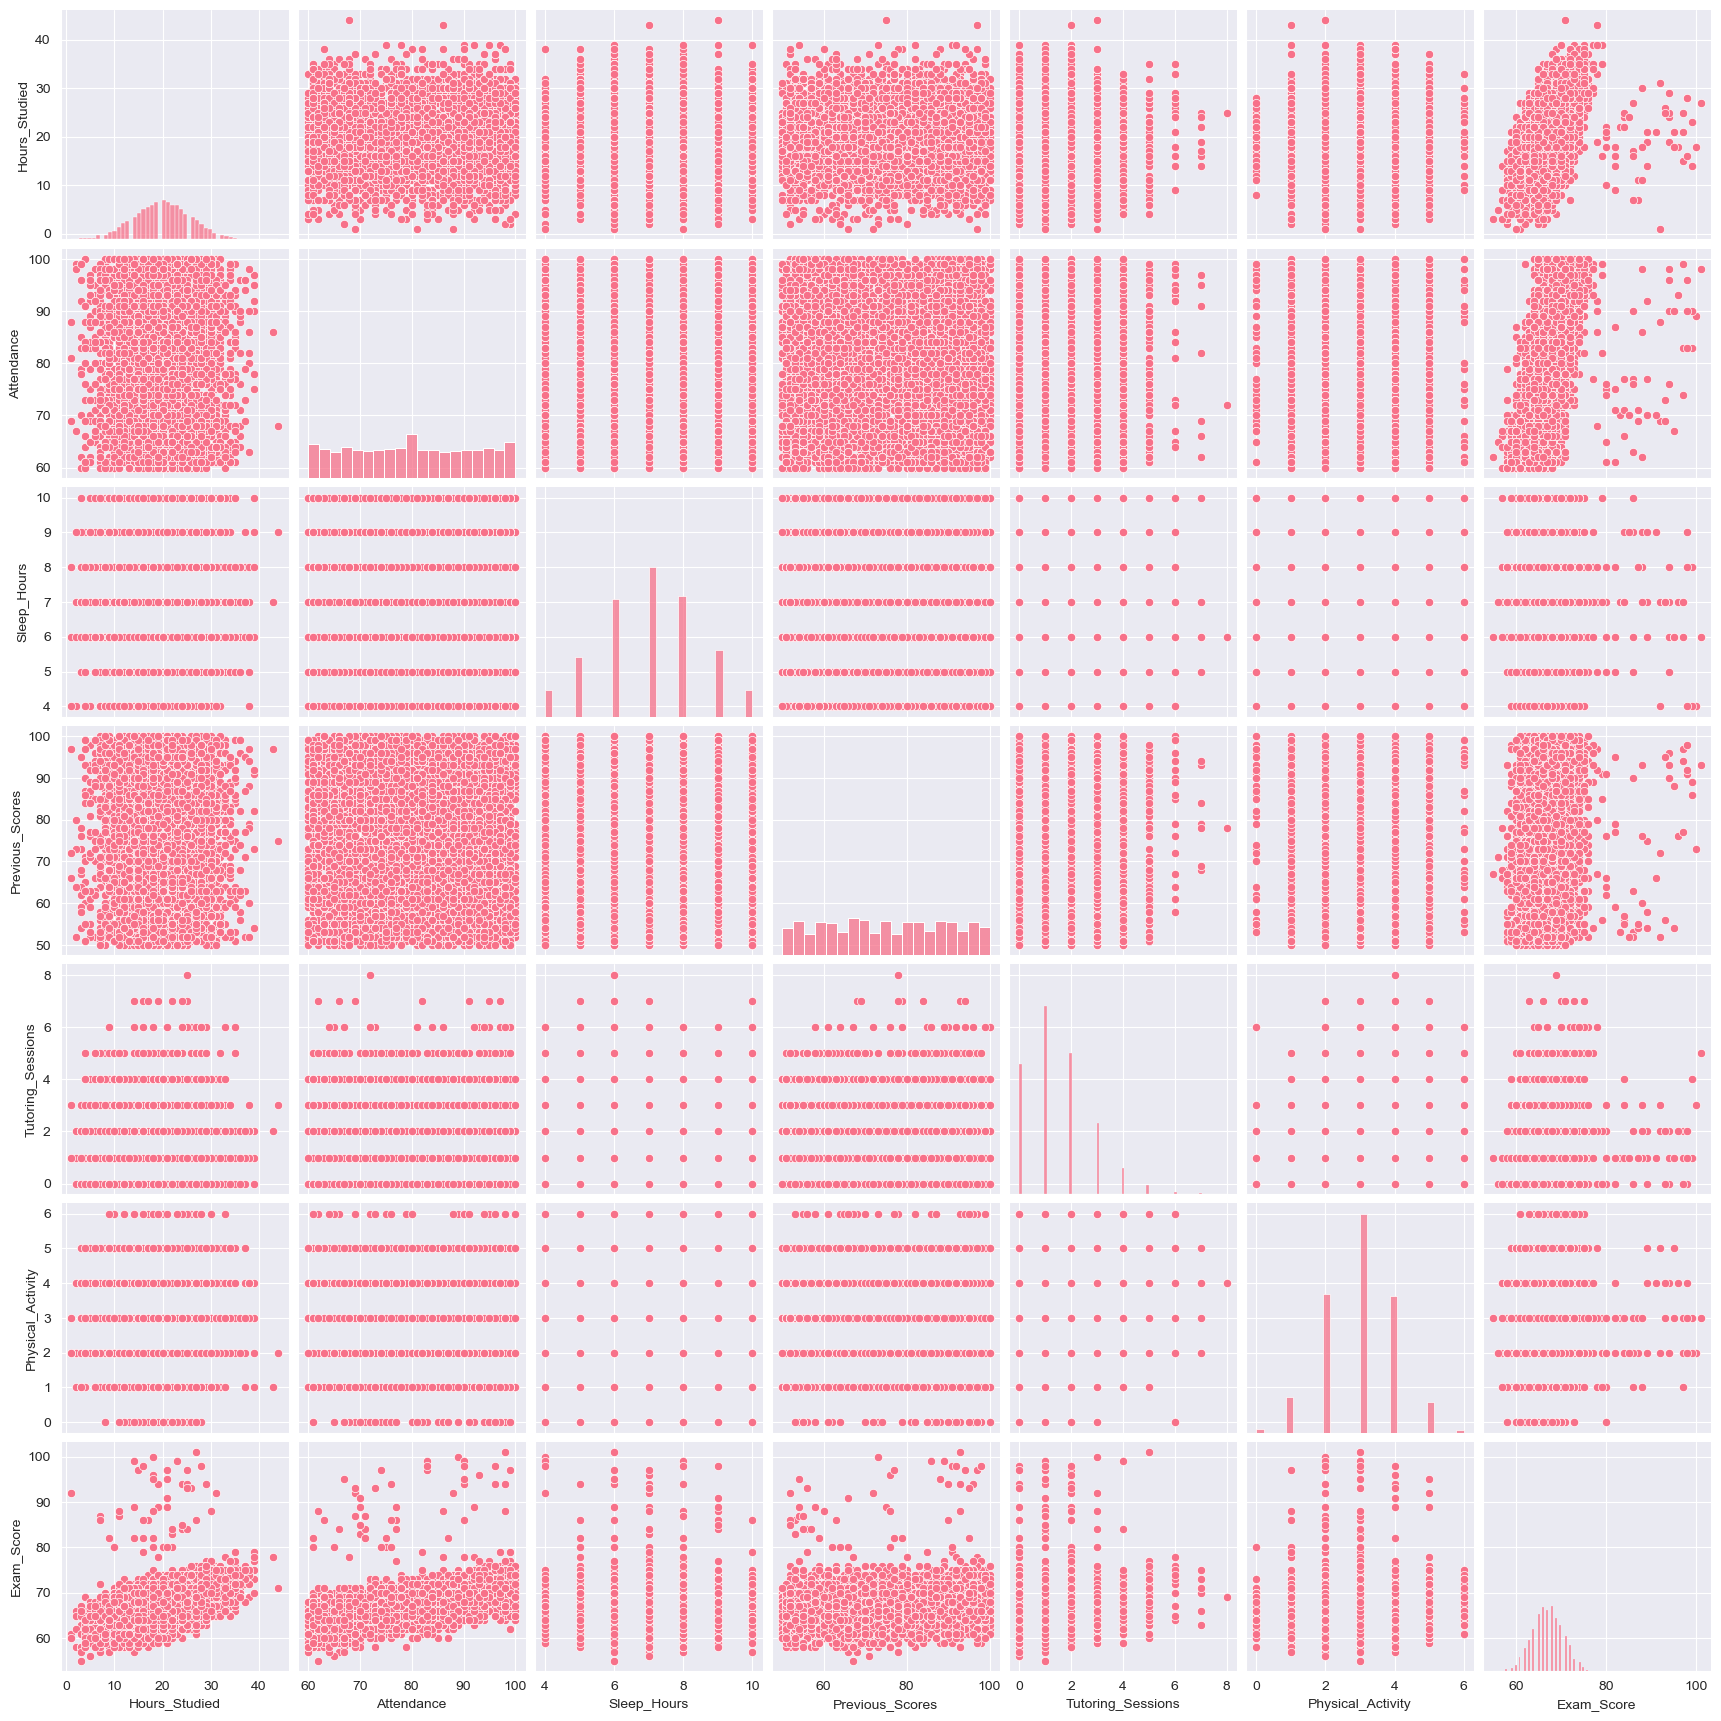

In [ ]:
# Multivariate Analysis:Pair plots to see the interaction between multiple variables.
sns.pairplot(STF_df)

In [ ]:
# filter out the continous variables

#get the number of unique values in each column the datafame
data_list = [[STF_df[x].nunique()] for x in list(STF_df.columns)]

count_df = pd.DataFrame(data=data_list, index=STF_df.columns, columns = ['count'])
cont_df = STF_df[list(count_df[count_df['count'] > 6].index)]

<Axes: >

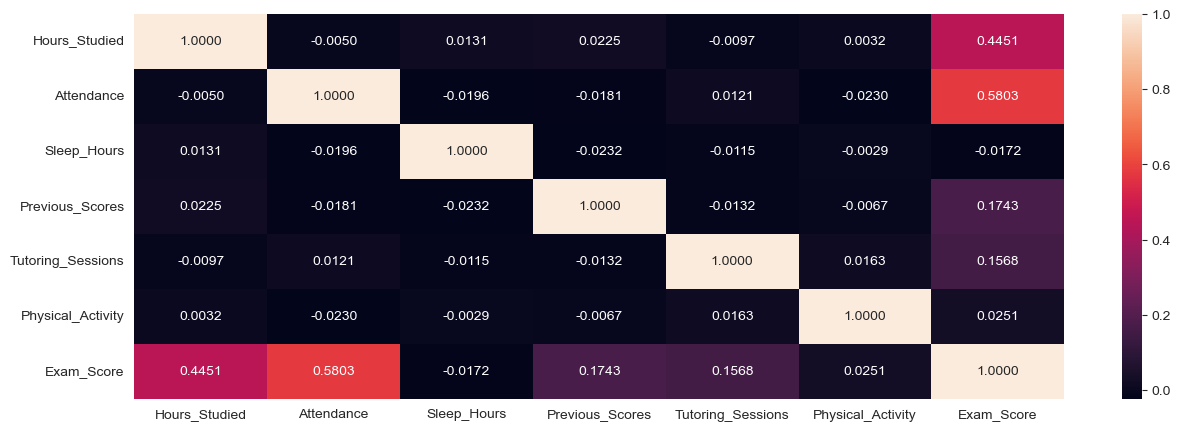

In [ ]:
# get correlation
plt.figure(figsize=(15, 5))
sns.heatmap(data = cont_df.corr(method = 'pearson'),annot = True, fmt ='0.4f')
#plt.xticks(rotation = 5)

#### Note:

In the correlation heatmap, darker colors signify stronger correlations, while lighter colors represent weaker ones. Key findings reveal strong correlations between:

- Attendance and Exam Score
- Sleep Hours and Exam Score
- Previous Scores and Exam Score
- Tutoring Sessions and Exam Score
- Physical Activities and Exam Score




### 4. Hypothesis Testing:
##### Test some key hypotheses using statistical methods:
1. One-Sample t-Test:
* Hypothesis: The average exam score is 75.
* Test if the sample mean of Exam_Score is significantly different from 75.
2. Two-Sample t-Test:
* Hypothesis: There is no significant difference in exam scores between students with and without Internet_Access.
* Compare the mean Exam_Score for students with and without internet access.
3. Paired t-Test (if applicable)
* If you have scores before and after a study period, you could test the difference.
4. Chi-Square Test:
*  Hypothesis: There is no association between School_Type and Parental_Involvement.
* Test for independence between categorical variables like School_Type and Parental_Involvement

In [ ]:
# One-sample t-Test

# set the hypothesis
ho = f'The average exam score is not significantly different from 75'
h1 = f'The average exam score is significantly different  75'

# set level of significance
alpha = 0.05

# Average exam score
avg_exam_score = 75

# unpacking
t_statistic, p_value = ttest_1samp(STF_df['Exam_Score'], avg_exam_score)
print(f't-statistic: {t_statistic}, p-value: {p_value}')

#decision rule
if p_value < alpha:
    print(f'{h1} @ t-statistic: {t_statistic}, p-value: {p_value}')
else:
    print(f'{ho} @ t-statistic: {t_statistic}, p-value: {p_value}')


t-statistic: -158.08129565519323, p-value: 0.0
The average exam score is significantly different  75 @ t-statistic: -158.08129565519323, p-value: 0.0


##### Conclusion: Internet Access vs. Exam Score
Conclusion: Reject H0. The data shows that the actual average exam score is significantly lower than 75 (t-statistic = -158.08, p-value < 0.001).

In [ ]:
# 4.2
#Two sample t-test

# set the hypothesis
ho = f'There is no significant difference in exam scores between students with and without Internet_Access.'
h1 = f'There is a significant difference in exam scores between students with and without Internet_Access'

# set level of significance
alpha = 0.05

# Filter tips based on time
with_access = STF_df[STF_df['Internet_Access'] == 'Yes']['Exam_Score']
without_access = STF_df[STF_df['Internet_Access'] == 'No']['Exam_Score']

# unpacking
T_stat, P_value = ttest_ind(with_access, without_access)
print(f't-statistic: {T_stat}, p-value: {P_value}')
#decision rule
if P_value < alpha:
    print(f'{h1} @ t-statistic: {T_stat}, p-value: {P_value}')
else:
    print(f'{ho} @ t-statistic: {T_stat}, p-value: {P_value}')


t-statistic: 4.188986958317149, p-value: 2.8385046310278915e-05
There is a significant difference in exam scores between students with and without Internet_Access @ t-statistic: 4.188986958317149, p-value: 2.8385046310278915e-05


##### Conclusion: Internet Access vs. Exam Score
Reject H0(null hypothesis). The data provides sufficient evidence to conclude that Internet Access has a significant positive impact on exam scores (t-statistic = 4.19, p-value < 0.001).


In [ ]:
# 4.3
#Chi square

# Set up our hypothesis
ho = 'There is no association between School_Type and Parental_Involvement'
h1 = 'There is no association between School_Type and Parental_Involvement'

#level of significance
alpha = 0.5

# Choose the test and compute the p-value
chi_df = pd.crosstab(STF_df['School_Type'], STF_df['Parental_Involvement'])
chi_stat, pvalue, dof, exp_freq = chi2_contingency(chi_df)

# decision rule
if pvalue < alpha:
    print(f'{h1} at p-value = {pvalue}')
else:
    print(f'{ho} at p-value = {pvalue}')

There is no association between School_Type and Parental_Involvement at p-value = 0.20967481685392614


##### Conclusion: School Type vs. Parental Involvement

 Fail to reject H0. The data does not provide sufficient evidence to conclude a significant association between School Type and Parental Involvement (p-value = 0.21).



In [ ]:
#Chi square 2: Test for independence between categorical variables like School_Type and Parental_Involvement

#Chi square
# Set up our hypothesis
ho = ' There is no level of dependency between School_Type and Parental_Involvement'
h1 = 'There is a level of dependency between Type and Parental_Involvement'

#level of significance
alpha = 0.5

# Choose the test and compute the p-value
contingency_table = pd.crosstab(STF_df['School_Type'], STF_df['Parental_Involvement'])
chi_stat, pvalue, dof, exp_freq = chi2_contingency(contingency_table)

# decision rule
if pvalue < alpha:
    print(f'{ho} at p-value = {pvalue}')
else:
    print(f'{h1} at p-value = {pvalue}')



 There is no level of dependency between School_Type and Parental_Involvement at p-value = 0.20967481685392614


##### Conclusion: School Type vs. Parental Involvement:
Fail to reject H0. The data does not provide sufficient evidence to conclude a level of dependency between School Type and Parental Involvement

### 5. Correlation Analysis:
1. Calculate the Pearson correlation coefficient between continuous variables like Hours_Studied, Family_Income, and Exam_Score.
2. Examine whether there is a significant relationship between the number of Tutoring_Sessions and Exam_Score

In [ ]:

# 5.Pearson correlation

# Observing the significance relationship between the number of Hours_Studied and Exam_Score
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between Hours_Studied and Exam_Score'
h1 = 'There is a significant relationship between Hours_Studied and Exam_Score'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(STF_df['Hours_Studied'], STF_df['Exam_Score'])

#decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{ho} @ p-value = {p_Value}')


There is a significant relationship between Hours_Studied and Exam_Score @ p-value = 4.524802143432994e-308


##### Conclusion:  Hours Studied vs. Exam Score
Reject H0. The data provides overwhelming evidence to conclude that Hours Studied has a significant positive impact on Exam Score (p-value ≈ 0)

In [ ]:
# Examine whether there is a significant relationship between the number of Tutoring_Sessions and Exam_Score
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between Tutoring_Sessions and Exam_Score'
h1 = 'There is a significant relationship between Tutoring_Sessions and Exam_Score'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, P_Value = pearsonr(STF_df['Tutoring_Sessions'], STF_df['Exam_Score'])

#decision rule
if p_value < alpha:
    print(f'{h1} @ p-value = {p_value}')
else:
    print(f'{ho} @ p-value = {p_value}')


There is a significant relationship between Tutoring_Sessions and Exam_Score @ p-value = 0.0


##### Conclusion Tutoring Sessions vs. Exam Score
Reject H0. The data shows that Tutoring Sessions have a significant positive impact on Exam Score (p-value < 0.001).


### 6. Conclusion and Insights:
1. Summarize the key findings from your statistical analysis:
*  Which factors had the strongest relationships with Exam_Score?
*  Were any of your initial hypotheses rejected?
*  What recommendations can you make based on the analysis? For example, should students increase their Hours_Studied or focus more on improving their Sleep_Hoursfor better academic performance?


### Summary of Findings:

####  Which factors had the strongest relationships with Exam_Score?

The hypothesis test conducted revealed  that, hours of study, tutoring session, internent access and duration of sleep  has a positive influence on student Exam score.
<br>
Given the following breakdown:
Strongest Relationships with Exam_Score:

1. Hours_Studied (p-value ≈ 0)
2. Tutoring_Sessions (p-value < 0.001)
3. Internet_Access (t-statistic = 4.19, p-value < 0.001)
4. Sleep_Hours (strong correlation)


#### Were any of your initial hypotheses rejected?

Yes, Three of the hypothesis conducted using personr and T-test rejected the initial hypothesis.
1. There is a significant difference in exam scores between students with and without Internet_Access @ t-statistic: 4.188986958317149, p-value: 2.8385046310278915<br>
2. There is a significant relationship between Tutoring_Sessions and Exam_Score @ p-value = 0.0
3. Average exam score equals 75 (rejected, actual average is lower)



#### Reccomendation:

To improve academic performance, student shuould:

1. Increase Hours_Studied, as it has a significant positive impact on Exam_Score.
2. Utilize Tutoring_Sessions, which significantly improve Exam_Score.
3. Ensure Internet_Access to support learning.
4. Prioritize adequate Sleep_Hours, as it correlates with better exam performance.
5. Schools and parents should focus on providing resources and support for students, particularly those without Internet_Access.
